In [1]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import json

In [2]:
from configure import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

In [3]:
consumer_key

'JjlUZsquKndqC7kJWHBJsxnsw'

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Target User Accounts
target_user = ("@BBCWorld", "@CNN", "@CBSNews", "@FoxNews","@nytimes")

# List for dictionaries of results
results_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_texts = []
time_stamp= []
user_name= []

# Loop through each user
for user in target_user:


  
    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            
        #Append tweet_text list to read the tweets:
            tweet_texts.append(tweet["text"])
            time_stamp.append(tweet["created_at"])
            user_name.append(tweet["user"]["screen_name"]) 
                

        # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

In [6]:
df = pd.DataFrame(
    {'User Name': user_name,
     'Time Stamp': time_stamp,
     'Text of Tweet': tweet_texts,
     'Compound Score':compound_list,
     'Positive Score':positive_list,
     'Neutral Score': neutral_list,
     'Negative Score':negative_list
     
    })
df

,User Name,Time Stamp,Text of Tweet,Compound Score,Positive Score,Neutral Score,Negative Score
0,BBCWorld,Thu Nov 07 20:42:07 +0000 2019,Chris Brown's yard sale makes people angry \n\...,-0.5106,0.000,0.769,0.231
1,BBCWorld,Thu Nov 07 19:56:26 +0000 2019,Hawaii man dies after falling down lava tube i...,-0.1531,0.000,0.873,0.127
2,BBCWorld,Thu Nov 07 18:19:33 +0000 2019,Bolivia mayor has hair forcibly cut by crowd o...,-0.4588,0.000,0.692,0.308
3,BBCWorld,Thu Nov 07 18:12:10 +0000 2019,What is defence alliance Nato? https://t.co/yA...,0.1027,0.219,0.781,0.000
4,BBCWorld,Thu Nov 07 18:11:49 +0000 2019,RT @BBCSport: Sonny Bill Williams has complete...,0.5994,0.163,0.837,0.000
5,BBCWorld,Thu Nov 07 17:52:42 +0000 2019,RT @BBCNews: Bloodhound's ultimate quest to br...,0.0000,0.000,1.000,0.000
6,BBCWorld,Thu Nov 07 17:18:43 +0000 2019,Eggstraordinary!\n\nhttps://t.co/HbAoAXpRCD,0.0000,0.000,1.000,0.000
7,BBCWorld,Thu Nov 07 16:55:38 +0000 2019,RT @BBCNews: Harry and Meghan visit military m...,0.0000,0.000,1.000,0.000
8,BBCWorld,Thu Nov 07 16:19:26 +0000 2019,David Noakes: Unlicensed cancer cure seller to...,-0.6597,0.000,0.672,0.328
9,BBCWorld,Thu Nov 07 15:44:59 +0000 2019,RT @BBCNorthAmerica: Jeff Sessions: The ex-att...,0.0000,0.000,1.000,0.000


In [7]:
mean_score = df.groupby('User Name').mean()
mean_score

,Compound Score,Positive Score,Neutral Score,Negative Score
User Name,,,,
BBCWorld,-0.216565,0.04373,0.78513,0.17111
CBSNews,-0.084974,0.05093,0.85842,0.09066
CNN,-0.034184,0.05413,0.87164,0.07420
FoxNews,-0.051324,0.06074,0.84514,0.09410
nytimes,-0.045361,0.06758,0.84788,0.08456


In [8]:
bbc = df[df['User Name']=='BBCWorld']
cnn = df[df['User Name']=='CNN']
cbs = df[df['User Name']=='CBSNews']
fox = df[df['User Name']=='FoxNews']
nyt = df[df['User Name']=='nytimes']

In [9]:
cnn = cnn.reset_index()
cnn ['Tweets Ago'] = cnn ['index']-99
cnn = cnn.sort_values(by='Tweets Ago', ascending=False)
cnn

,index,User Name,Time Stamp,Text of Tweet,Compound Score,Positive Score,Neutral Score,Negative Score,Tweets Ago
99,199,CNN,Thu Nov 07 06:58:02 +0000 2019,"Despite being invisible for days, Rudy Giulian...",0.0000,0.000,1.000,0.000,100
98,198,CNN,Thu Nov 07 07:05:51 +0000 2019,The death was ruled a homicide after an autops...,-0.5994,0.000,0.813,0.187,99
97,197,CNN,Thu Nov 07 07:12:03 +0000 2019,Recall alert: More than 2 million pounds of po...,-0.1531,0.096,0.783,0.122,98
96,196,CNN,Thu Nov 07 07:20:46 +0000 2019,Do you suffer from insomnia? You may be more l...,-0.8779,0.000,0.653,0.347,97
95,195,CNN,Thu Nov 07 07:29:38 +0000 2019,"A warning system was activated by mistake, lea...",-0.7650,0.000,0.648,0.352,96
94,194,CNN,Thu Nov 07 07:38:39 +0000 2019,Xerox is reportedly considering buying Hewlett...,0.0000,0.000,1.000,0.000,95
93,193,CNN,Thu Nov 07 07:47:28 +0000 2019,"For years, Midland, Texas, was a quiet corner ...",0.0000,0.000,1.000,0.000,94
92,192,CNN,Thu Nov 07 07:56:28 +0000 2019,"Gus Buczek, a 62-year-old firefighter and Mari...",-0.8176,0.000,0.667,0.333,93
91,191,CNN,Thu Nov 07 08:03:53 +0000 2019,25-year-old New Zealand lawmaker Chlöe Swarbri...,0.0516,0.226,0.598,0.175,92
90,190,CNN,Thu Nov 07 08:13:17 +0000 2019,Former Vice President Joe Biden bests other ca...,0.0000,0.000,1.000,0.000,91


In [10]:
bbc = bbc.reset_index()
bbc ['Tweets Ago'] = bbc ['index']+1
bbc = bbc.sort_values(by='Tweets Ago', ascending=False)
bbc

,index,User Name,Time Stamp,Text of Tweet,Compound Score,Positive Score,Neutral Score,Negative Score,Tweets Ago
99,99,BBCWorld,Tue Nov 05 21:34:07 +0000 2019,Jean-Claude Juncker: 'I've had enough Brexit' ...,0.2960,0.180,0.820,0.000,100
98,98,BBCWorld,Tue Nov 05 22:02:05 +0000 2019,Mexico Mormons: Who are the US victims of ambu...,-0.6597,0.000,0.625,0.375,99
97,97,BBCWorld,Tue Nov 05 22:15:56 +0000 2019,Brazil dam owner Vale failed to report danger ...,-0.7717,0.000,0.573,0.427,98
96,96,BBCWorld,Wed Nov 06 00:21:03 +0000 2019,How Cuban art fed Africa's liberation struggle...,-0.3612,0.000,0.737,0.263,97
95,95,BBCWorld,Wed Nov 06 00:23:25 +0000 2019,Spanish election: Five face off in race to run...,0.0000,0.000,1.000,0.000,96
94,94,BBCWorld,Wed Nov 06 00:25:58 +0000 2019,Pakistan police investigate 'joint suicide' of...,-0.6705,0.000,0.609,0.391,95
93,93,BBCWorld,Wed Nov 06 01:05:04 +0000 2019,Hunters of rare Swiss ibex stir Alps wildlife ...,0.0000,0.000,1.000,0.000,94
92,92,BBCWorld,Wed Nov 06 01:23:40 +0000 2019,California murder suspects escaped jail throug...,-0.7964,0.000,0.496,0.504,93
91,91,BBCWorld,Wed Nov 06 02:40:08 +0000 2019,Matildas: Australia women's football team in l...,-0.0258,0.121,0.748,0.131,92
90,90,BBCWorld,Wed Nov 06 03:03:10 +0000 2019,Grace Millane murder: Prosecution presents fir...,-0.7269,0.178,0.318,0.503,91


In [11]:
cbs = cbs.reset_index()
cbs ['Tweets Ago'] = cbs ['index']-199
cbs = cbs.sort_values(by='Tweets Ago', ascending=False)
cbs

,index,User Name,Time Stamp,Text of Tweet,Compound Score,Positive Score,Neutral Score,Negative Score,Tweets Ago
99,299,CBSNews,Thu Nov 07 00:19:44 +0000 2019,"Steve Bannon will testify against Roger Stone,...",0.0000,0.000,1.000,0.000,100
98,298,CBSNews,Thu Nov 07 00:39:47 +0000 2019,"Boeing CEO says he ""thought about"" quitting af...",-0.4215,0.000,0.865,0.135,99
97,297,CBSNews,Thu Nov 07 00:59:42 +0000 2019,Trump will welcome Turkey's president to White...,0.0000,0.158,0.684,0.158,98
96,296,CBSNews,Thu Nov 07 01:20:10 +0000 2019,New York Gov. Andrew Cuomo says President Trum...,-0.1531,0.000,0.926,0.074,97
95,295,CBSNews,Thu Nov 07 01:39:44 +0000 2019,Pro-Beijing lawmaker stabbed while campaigning...,-0.4404,0.000,0.756,0.244,96
94,294,CBSNews,Thu Nov 07 02:01:06 +0000 2019,Elderly man dies after falling into a lava tub...,-0.1531,0.000,0.873,0.127,95
93,293,CBSNews,Thu Nov 07 02:19:38 +0000 2019,"""OK, boomer"": 25-year-old lawmaker shuts down ...",0.0000,0.000,1.000,0.000,94
92,292,CBSNews,Thu Nov 07 02:39:30 +0000 2019,"""Being Trump only works for Trump"": Matt Bevin...",0.0000,0.000,1.000,0.000,93
91,291,CBSNews,Thu Nov 07 02:59:39 +0000 2019,Rapper T.I. says he visits the gynecologist ev...,0.0000,0.000,1.000,0.000,92
90,290,CBSNews,Thu Nov 07 03:19:54 +0000 2019,2019 could be a record year for CEO departures...,0.0000,0.000,1.000,0.000,91


In [12]:
fox = fox.reset_index()
fox ['Tweets Ago'] = fox ['index']-299
fox = fox.sort_values(by='Tweets Ago', ascending=False)
fox

,index,User Name,Time Stamp,Text of Tweet,Compound Score,Positive Score,Neutral Score,Negative Score,Tweets Ago
99,399,FoxNews,Thu Nov 08 00:29:01 +0000 2018,RT @MikeEmanuelFox: Democrats gear up for 2020...,0.0000,0.000,1.000,0.000,100
98,398,FoxNews,Thu Nov 08 00:32:49 +0000 2018,Dershowitz on Sessions' Departure: Not All GOP...,0.1027,0.098,0.825,0.077,99
97,397,FoxNews,Thu Nov 08 00:50:10 +0000 2018,".@GovChrisSununu: ""I don't think last night wa...",0.0000,0.000,1.000,0.000,98
96,396,FoxNews,Thu Nov 08 00:53:56 +0000 2018,BREAKING: CNN's Jim Acosta press pass suspende...,-0.4767,0.000,0.807,0.193,97
95,395,FoxNews,Thu Nov 08 00:58:26 +0000 2018,CNN's Jim Acosta press pass suspended by White...,-0.4767,0.000,0.795,0.205,96
94,394,FoxNews,Thu Nov 08 01:01:04 +0000 2018,"Georgia posts private information of 300,000 a...",-0.2732,0.000,0.826,0.174,95
93,393,FoxNews,Thu Nov 08 01:05:46 +0000 2018,"Former Governor John Sununu: ""What really made...",0.0000,0.000,1.000,0.000,94
92,392,FoxNews,Thu Nov 08 01:13:00 +0000 2018,'Take Their Word For It': Jim Jordan Warns of ...,-0.1027,0.000,0.915,0.085,93
91,391,FoxNews,Thu Nov 08 01:25:49 +0000 2018,Violinist claims Southwest Airlines forced him...,-0.6597,0.000,0.686,0.314,92
90,390,FoxNews,Thu Nov 08 01:37:28 +0000 2018,Sacha Baron Cohen revives 'Borat' character to...,0.3818,0.191,0.809,0.000,91


In [13]:
nyt = nyt.reset_index()
nyt ['Tweets Ago'] = nyt ['index']-399
nyt = nyt.sort_values(by='Tweets Ago', ascending=False)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


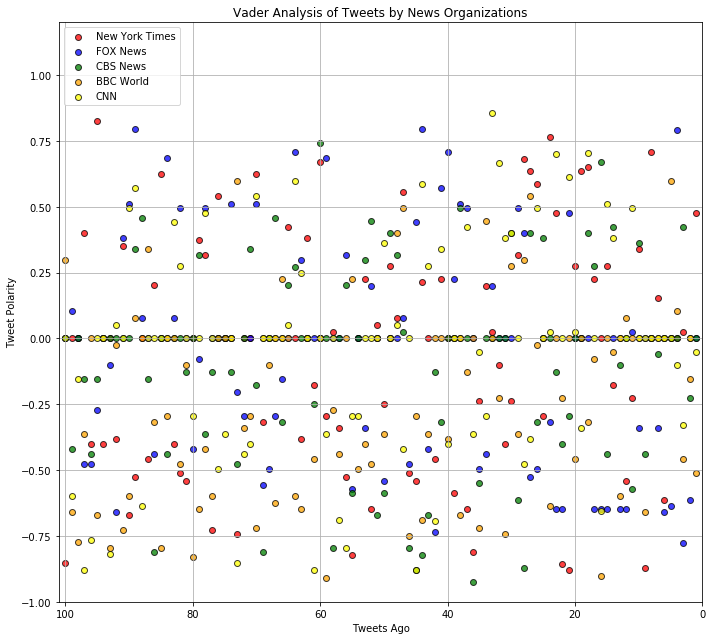

In [25]:
fig, ax = plt.subplots()
rects1= ax.scatter(nyt['Tweets Ago'], nyt['Compound Score'], marker="o", facecolors="red",label="New York Times", edgecolors="black", alpha=0.75)
rects2 = ax.scatter(fox['Tweets Ago'], fox['Compound Score'], marker="o",label="FOX News", facecolors="blue", edgecolors="black", alpha=0.75)
rects3 = ax.scatter(cbs['Tweets Ago'], cbs['Compound Score'], marker="o",label="CBS News", facecolors="green", edgecolors="black", alpha=0.75)
rects4 = ax.scatter(bbc['Tweets Ago'], bbc['Compound Score'], marker="o",label="BBC World", facecolors="orange", edgecolors="black", alpha=0.75)
rects5 = ax.scatter(cnn['Tweets Ago'], cnn['Compound Score'], marker="o",label="CNN", facecolors="yellow", edgecolors="black", alpha=0.75)

ax.set_title("Vader Analysis of Tweets by News Organizations")
ax.set_xlabel("Tweets Ago")
ax.set_ylabel("Tweet Polarity")
ax.set_xlim(101, 0)
ax.set_ylim(-1, 1.2)
ax.legend(loc='upper left')
ax.grid()
fig.set_size_inches(10, 9)
fig.tight_layout()
plt.savefig("Vader Analysis of New Organizations.png")
fig.show()


In [15]:
mean_score = mean_score.reset_index()
mean_score = mean_score.round(2)
users= mean_score['User Name']
score = mean_score['Compound Score']

In [16]:
users

0    BBCWorld
1     CBSNews
2         CNN
3     FoxNews
4     nytimes
Name: User Name, dtype: object

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


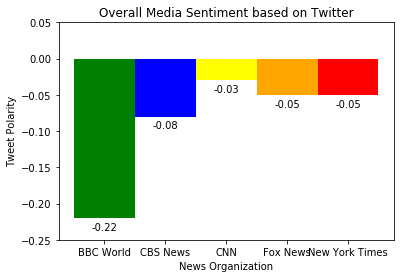

In [24]:
x = x = np.arange(len(score))
labels = ["BBC World","CBS News","CNN","Fox News","New York Times"]
fig, ax = plt.subplots()
rects1 = ax.bar(0, score[0], color="green",width=1, align="center", label = "BBC World")
rects2 = ax.bar(1, score[1], color="blue",width=1, align="center",label = "CBS News")
rects3 = ax.bar(2, score[2], color="yellow",width=1, align="center",label = "CNN")
rects4 = ax.bar(3, score[3], color="orange",width=1, align="center",label = "Fox News")
rects5 = ax.bar(4, score[4], color="red",width=1, align="center",label = "New York Times")

ax.set_ylabel("Tweet Polarity")
ax.set_xlabel("News Organization")
ax.set_title("Overall Media Sentiment based on Twitter")
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.set_ylim(-.250, .05)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height-.015),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center_baseline')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
plt.savefig("Vader Analysis of New Organizations, Bar Graph.png")

fig.show()

In [26]:
df.to_csv("Vader Analysis.csv")
mean_score.to_csv("Mean Score.csv")
